In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests
import pickle

#ETL data
##Some selected securities from S&P500
1. Listing
2. Download
3. Load from local file

In [ ]:
sp500_tickers = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'TSLA', 'META', 'BRK.B', 'V', 'JPM', 'UNH', 'HD', 'PYPL', 'DIS', 'MA', 'PG',
    'VZ', 'NFLX', 'INTC', 'KO', 'PEP', 'BA', 'XOM', 'CVX', 'CSCO', 'WMT', 'T', 'MCD', 'ORCL', 'CAT', 'MRK', 'COST',
    'GE', 'BABA', 'ABBV', 'ADBE', 'AXP', 'CRM', 'AMGN', 'INTU', 'AMT', 'NKE', 'GS', 'WBA', 'SBUX', 'CSX', 'LMT', 'MDT', 'GS',
    'SPGI', 'BIIB', 'LUV', 'UNP', 'ISRG', 'CI', 'CVS', 'TMO', 'HON', 'LRCX', 'SHW', 'RTX', 'MMM', 'BKNG', 'ITW', 'FISV', 'MU',
    'QCOM', 'CHTR', 'STZ', 'TSCO', 'F', 'DE', 'NEE', 'MS', 'ZTS', 'WFC', 'PLD', 'AON', 'BMY', 'MMC', 'FIS', 'KHC', 'SLB', 'APD',
    'MDLZ', 'CHD', 'HUM', 'AIG', 'EL', 'SYK', 'HCA', 'DUK', 'ALL', 'C', 'OXY', 'HPE', 'SPG', 'SYY', 'VLO', 'ES', 'VMC', 'FTNT',
    'DHR', 'EOG', 'IT', 'AFL', 'NOC', 'COP', 'GILD', 'VRTX', 'WDC', 'MSCI', 'ADP', 'EXC', 'FANG', 'ZBH', 'CTSH', 'NEM', 'LHX',
    'DOW', 'BKR', 'APTV', 'TDG', 'CHKP', 'KMB', 'IQV', 'PFE', 'MU', 'BIIB', 'RMD', 'WEC', 'VFC', 'CME', 'LULU', 'MCK', 'ROST',
    'DG', 'O', 'TGT', 'SWKS', 'TROW', 'PKI', 'AEP', 'PEP', 'STT', 'MCO', 'AIZ', 'DHI', 'CTAS', 'SPGI', 'ADSK', 'FSLR', 'HIG',
    'CSX', 'NUE', 'TMUS', 'FTV', 'EXPD', 'BAX', 'MTD', 'SWK', 'ETN', 'MMC', 'FCX', 'KSU', 'PSX', 'WMT', 'RSG', 'LNC', 'PLUG',
    'TWTR', 'SQ', 'GOOG', 'MELI', 'DOCU', 'SPOT', 'BIDU', 'UBER', 'LYFT', 'PINS', 'SNAP', 'SQ', 'FSLR', 'SPLK', 'NVDA', 'PYPL',
    'RNG', 'VEEV', 'ZS', 'ZM', 'DOCU', 'MDB', 'PINS', 'COST', 'NTES', 'ROKU', 'INTC', 'COST', 'MRNA', 'VEEV', 'SHOP', 'FVRR',
    'WBA', 'NKE', 'TMO', 'IDXX', 'SWKS', 'MCD', 'AEP', 'AMT', 'EXC', 'KLAC', 'AON', 'VRTX', 'LULU', 'ZBH', 'HCA', 'FISV',
    'TGT', 'MU', 'AMT', 'UNP', 'CME', 'VFC', 'SYY', 'SYK', 'CVS', 'SBUX', 'PFE', 'TROW', 'NEE', 'SPLK', 'FIS', 'FANG', 'PNC',
    'TXN', 'CSCO', 'TMO', 'PGR', 'AMGN', 'SHOP', 'V', 'KMB', 'ROST', 'DXC', 'TAP', 'IDXX', 'BAX', 'LMT', 'RMD', 'ITW', 'RSG',
    'REGN', 'COST', 'LMT', 'DHR', 'JPM', 'C', 'LUV', 'HUM', 'APD', 'MS', 'HCA', 'WDC', 'ABT', 'COST', 'AMZN', 'MA', 'MSFT', 'VZ',
    'PFE', 'WMT', 'BMY', 'ZTS', 'GD', 'WFC', 'CHTR', 'GILD', 'FIS', 'ZBH', 'BIIB', 'LOW', 'NEE', 'VEEV', 'SWK', 'BA', 'MSCI',
    'AVGO', 'GS', 'MU', 'UNH', 'DE', 'KHC', 'EXC', 'XOM', 'PYPL', 'LHX', 'LULU', 'CVS', 'GE', 'DOW', 'BABA', 'MDT', 'AAPL',
    'HCA', 'BA', 'BAX', 'SBUX', 'NOC', 'LLY', 'ROKU', 'CHKP', 'SNAP', 'WEC', 'EL', 'COF', 'WMT', 'ZBH', 'PEP', 'EXPD', 'PLD',
    'SPGI', 'MRNA', 'AMGN', 'HD', 'INTC', 'BIIB', 'ORCL', 'PG', 'CME', 'FCX', 'ALGN', 'MMM', 'V', 'BMY', 'STZ', 'DHR', 'VMC',
    'COP', 'NTES', 'RTX', 'KO', 'GE', 'JNJ', 'AVGO', 'NSC', 'EOG', 'GPN', 'ADP', 'SYY', 'NEE', 'COST', 'SPGI', 'RSG', 'DLR',
    'BKR', 'SPLK', 'PLD', 'VFC', 'TMO', 'LMT', 'EOG', 'CVS', 'NEM', 'MRK', 'AMGN', 'GOOG', 'CAT', 'AIG', 'CVX', 'CVS', 'AIG',
    'TROW', 'CSX', 'MMC', 'RMD', 'HON', 'ZTS', 'AXP', 'T', 'ADSK', 'FTV', 'LHX', 'MSCI', 'PFE', 'DXC', 'LULU', 'PG', 'AMT',
    'BAX', 'CSCO', 'HCA', 'DIS', 'VZ', 'IQV', 'EXC', 'AXP', 'REGN', 'CTAS', 'WEC', 'FISV', 'UNP', 'PEP', 'VLO', 'NKE', 'TRV',
    'GE', 'NUE', 'NEE', 'INTC', 'ALXN', 'AON', 'IDXX', 'AAPL', 'WMT', 'TMO', 'MDT', 'HON', 'XOM', 'LMT', 'SBUX', 'MMM', 'KMB',
    'APD', 'WDC', 'MSCI', 'ZTS', 'KHC', 'GS', 'AIG', 'BMY', 'PYPL', 'WFC', 'LUV', 'PG', 'AMGN', 'ZBH', 'NVDA', 'TGT', 'CRM'
]

In [ ]:
# data = yf.download(sp500_tickers, start='2000-01-01', end='2025-04-01', auto_adjust=True)

# with open('/content/drive/MyDrive/data_Multilayer spillover with ML/data_2000_20250401_yfinance.pkl', 'wb') as f:
#     pickle.dump(data, f)

with open('/content/drive/MyDrive/data_Multilayer spillover with ML/data_2000_20250401_yfinance.pkl', 'rb') as file:
    data = pickle.load(file)

In [ ]:
df_sp500_price = data['Close'].dropna(axis=1).dropna()

In [ ]:
df_sp500_return = data['Close'].dropna(axis=1).dropna().pct_change().dropna()

In [ ]:
df_sp500_tmp_close = data['Close']
df_sp500_tmp_volume = data['Volume']

In [ ]:
df_sp500_tradingval_tmp = df_sp500_tmp_close * df_sp500_tmp_volume
df_sp500_tradingval = df_sp500_tradingval_tmp.dropna(axis=1).dropna()

In [ ]:
layers = [df_sp500_price.head(10), df_sp500_return.head(10), df_sp500_tradingval.head(10)]

#**Layers**
1. Define `granger_causality_all_pairs()` function
2. Granger test has been written for find relation between securities (nodes) in each layer.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests
from joblib import Parallel, delayed
from tqdm import tqdm
import pandas as pd

def granger_causality_all_pairs(df, max_lag=[1], num_threads=8):
    cols = df.columns
    num_columns = len(cols)
    p_values = np.zeros((num_columns, num_columns))

    # Function to process each pair of columns
    def process_pair(i, j):
        try:
            result = grangercausalitytests(df[[df.columns[i], df.columns[j]]], max_lag, verbose=False)
            return (i, j, result[1][0]['ssr_chi2test'][1])  # Return the pair and p-value
        except Exception as e:
            print(f" ======================== Exception ======================== ")
            print(f"Failed pair: {i}, {j}")
            print(f"Data:\n{df[[df.columns[i], df.columns[j]]].head()}")
            print(f"Error: {e}")
            return (i, j, None)  # Return None for failed pair

    # Create a list of tasks (i, j) pairs to process in parallel
    tasks = [(i, j) for i in range(num_columns) for j in range(num_columns) if i != j]

    # Use joblib to parallelize the processing of pairs
    results = Parallel(n_jobs=num_threads)(delayed(process_pair)(i, j) for i, j in tqdm(tasks, desc="Processing Pairs", total=len(tasks)))

    # Store the results in the p_values matrix
    for i, j, p_value in results:
        if p_value is not None:
            p_values[i, j] = p_value

    # Convert the p_values matrix into a DataFrame with proper column names
    p_values_df = pd.DataFrame(p_values, columns=cols, index=cols)

    return p_values_df


#**Sliding window is incrementing with 30 days steps and 100 days as window length**

This part implements a sliding window technique on time-series data, where the window slides forward in increments of 30 days. Each window represents a 100-day span, allowing for efficient processing and analysis of data in overlapping segments.

In [ ]:
import time

def rolling_window_on_data(df):
  for unit in np.arange(step=30,stop=len(df)):
    window = df.iloc[unit:unit+100]
    maxx = window.index.max()

    # Cut boundry before loss data in length of window
    if maxx >= np.datetime64('2025-03-31 00:00:00'): break
    yield window

#**Local layers' data**

In [12]:
with open('/content/drive/MyDrive/data_Multilayer spillover with ML/layers/layer1/sp500_return_times_209_evolution.pkl', 'rb') as file:
    layer_return = pickle.load(file)

with open('/content/drive/MyDrive/data_Multilayer spillover with ML/layers/layer2/sp500_price_times_209_evolution.pkl', 'rb') as file:
    layer_price = pickle.load(file)

with open('/content/drive/MyDrive/data_Multilayer spillover with ML/layers/layer3/sp500_tradingval_times_209_evolution.pkl', 'rb') as file:
    layer_tradval = pickle.load(file)



This part trying to calculate granger causality and save them with determined frequency in a folder in google drive.

In [ ]:

def run_window_func_exec(input_df_window):
  layer0_t_evolution = []

  for i,layer_0_t in enumerate(rolling_window_on_data(input_df_window)):
    if i>=0:
      print(i,layer_0_t.index.min(), layer_0_t.index.max(), sep=',')
      p_values_matrix = granger_causality_all_pairs(layer_0_t, max_lag=[1])
      layer0_t_evolution.append(p_values_matrix)

      print(f'step: {len(layer0_t_evolution)}')
      print(f'elements: {len(layer0_t_evolution[len(layer0_t_evolution)-1])}')

      if i%5 == 0:
        with open(f'/content/drive/MyDrive/data_Multilayer spillover with ML/layers/XXXX/layer3_tradingval_{i}_times_evolution.pkl', 'wb') as f:
          pickle.dump(layer0_t_evolution, f)

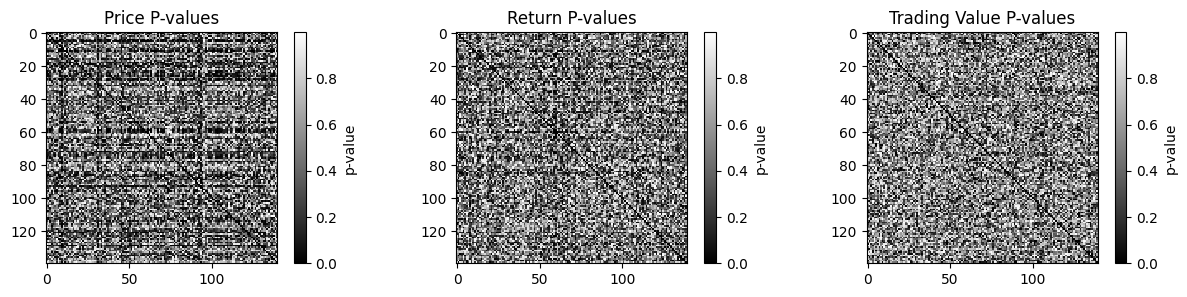

In [15]:
fig_layer, axs_layer = plt.subplots(1,3, figsize=(15, 3))

t_layer = 100

df0_layer = layer_price[t_layer]
axs_layer[0].imshow(df0_layer, cmap='gist_gray', interpolation='none')
axs_layer[0].set_title('Price P-values')
fig_layer.colorbar(axs_layer[0].imshow(df0_layer, cmap='gist_gray', interpolation='none'), ax=axs_layer[0], label='p-value')

df1_layer = layer_return[t_layer]
axs_layer[1].imshow(df1_layer, cmap='gist_gray', interpolation='none')
axs_layer[1].set_title('Return P-values')
fig_layer.colorbar(axs_layer[1].imshow(df1_layer, cmap='gist_gray', interpolation='none'), ax=axs_layer[1], label='p-value')

df2_layer = layer_tradval[t_layer]
axs_layer[2].imshow(df2_layer, cmap='gist_gray', interpolation='none')
axs_layer[2].set_title('Trading Value P-values')
fig_layer.colorbar(axs_layer[2].imshow(df2_layer, cmap='gist_gray', interpolation='none'), ax=axs_layer[2], label='p-value')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from joblib import Parallel, delayed
import pandas as pd
from tqdm import tqdm  # Import tqdm for progress bar

def build_weighted_adjacency_matrix_rf(target_df, feature_df, lag=1, n_estimators=100, random_state=42, n_jobs=-1):
    """
    Build a weighted adjacency matrix using Random Forest feature importances as weights.

    Parameters:
    - target_df: DataFrame of prices (targets)
    - feature_df: DataFrame of volumes (features)
    - lag: How many time steps to shift feature_df
    - n_estimators: Number of trees in the forest
    - random_state: Random seed for reproducibility
    - n_jobs: Number of jobs to run in parallel (use -1 for all cores)

    Returns:
    - weighted_adjacency_df: DataFrame (targets x features), weighted by feature importance
    """
    feature_df_shifted = feature_df.shift(lag)

    # Function to calculate feature importances for each target column
    def compute_feature_importances(target_col):
        df_combined = pd.concat([feature_df_shifted, target_df[target_col]], axis=1).dropna()
        X = df_combined[feature_df.columns]
        y = df_combined[target_col]

        rf = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
        rf.fit(X, y)
        return pd.Series(rf.feature_importances_, index=X.columns)

    # Set up tqdm with joblib's Parallel to show progress bar
    # The `tqdm` wraps the iterator to display progress for parallel execution
    adjacency_data = Parallel(n_jobs=n_jobs)(
        delayed(compute_feature_importances)(target_col)
        for target_col in tqdm(target_df.columns, desc="Processing target columns")
    )

    # Create weighted adjacency matrix
    weighted_adjacency_df = pd.DataFrame(adjacency_data, index=target_df.columns, columns=feature_df.columns)
    return weighted_adjacency_df


#**Local interlayes' data**

In [2]:
with open('/content/drive/MyDrive/data_Multilayer spillover with ML/layers/interlayer12/interlayer12_s_price_t_return_complete_evolution.pkl', 'rb') as file:
    interlayer12_s_Pirce_t_Return = pickle.load(file)

with open('/content/drive/MyDrive/data_Multilayer spillover with ML/layers/interlayer31/interlayer31_s_tradval_t_price_complete_evolution.pkl', 'rb') as file:
    interlayer31_s_Tradval_t_price = pickle.load(file)

with open('/content/drive/MyDrive/data_Multilayer spillover with ML/layers/interlayer32/interlayer32_s_tradval_t_return_complete_evolution.pkl', 'rb') as file:
    interlayer32_s_Tradval_t_return = pickle.load(file)


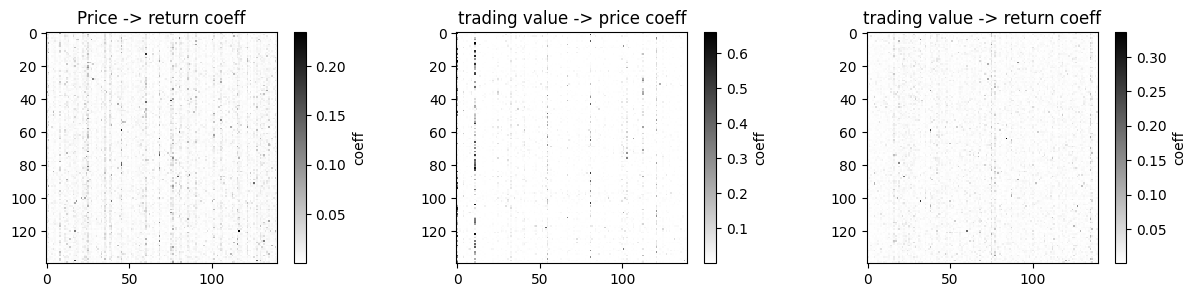

In [17]:
fig_interlayer, axs_interlayer = plt.subplots(1,3, figsize=(15, 3))

t_interlayer = 60

df0_interlayer = interlayer12_s_Pirce_t_Return[t_interlayer]
axs_interlayer[0].imshow(df0_interlayer, cmap='binary', interpolation='none')
axs_interlayer[0].set_title('Price -> return coeff')
fig_interlayer.colorbar(axs_interlayer[0].imshow(df0_interlayer, cmap='binary', interpolation='none'), ax=axs_interlayer[0], label='coeff')

df1_interlayer = interlayer31_s_Tradval_t_price[t_interlayer]
axs_interlayer[1].imshow(df1_interlayer, cmap='binary', interpolation='none')
axs_interlayer[1].set_title('trading value -> price coeff')
fig_interlayer.colorbar(axs_interlayer[1].imshow(df1_interlayer, cmap='binary', interpolation='none'), ax=axs_interlayer[1], label='coeff')

df2_interlayer = interlayer32_s_Tradval_t_return[t_interlayer]
axs_interlayer[2].imshow(df2_interlayer, cmap='binary', interpolation='none')
axs_interlayer[2].set_title('trading value -> return coeff')
fig_interlayer.colorbar(axs_interlayer[2].imshow(df2_interlayer, cmap='binary', interpolation='none'), ax=axs_interlayer[2], label='coeff')

#**Interlayers**
1. Find realtions with lag
2. use random forest (dimension reduction technique)

In [5]:
def run_interlayer_func_exec(df_sp500_return, df_sp500_tradingval):
  interlayer_time_df = []
  k = 0
  for window_return, window_tradval in zip(rolling_window_on_data(df_sp500_return), rolling_window_on_data(df_sp500_tradingval.iloc[1:])):
    # print(window_return.index.min(), window_return.index.max())
    # print(window_tradval.index.min(), window_tradval.index.max())

    if k>=0 and k<=300:

      window_return.columns = [col + '_return' for col in window_return.columns]
      window_tradval.columns = [col + '_tradval' for col in window_tradval.columns]


      ## Sampple data execution for testing
      # sample_result = build_weighted_adjacency_matrix_rf(window_price[window_price.columns[0:20]], \
      #                                             window_return[window_return.columns[0:20]], \
      #                                             lag=1, \
      #                                             n_estimators=100, \
      #                                             random_state=42)

      # Prime execution
      result = build_weighted_adjacency_matrix_rf(window_return[window_return.columns],\
                                                  window_tradval[window_tradval.columns], \
                                                  lag=1, \
                                                  n_estimators=100, \
                                                  random_state=66)

      interlayer_time_df.append(result)

      print(f"step:{k}")

      if k%5 == 0:
        with open(f'/content/drive/MyDrive/data_Multilayer spillover with ML/layers/interlayer32/interlayer32_s_tradval_t_return_{k}_times_evolution.pkl', 'wb') as f:
          pickle.dump(interlayer_time_df, f)


    k = k+1

